In [1]:
import csv
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
path = 'hillary-clinton-emails/Emails.csv'
table_text = pd.read_csv(path)

Have a look at the name of the columns we have ...

In [3]:
table_text.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

# Question 1 : WordCloud

After a quick look, we find that will work with column 'ExtractedBodyText'. We decided to not use 'ExtractedSubject' column, because we often already have it in the ExtractedBodyText, and it added typical email words like 'Re', 'Fw' that we don't want in our wordcloud. 


On the next cell, we group in a single string variable all the words. We have realised that all mails with less than 10 characters are useless.

In [4]:
text = ''
for i in np.arange(table_text.shape[0]):
    if (len(str(table_text.ExtractedBodyText[i])) > 10):
        text += ' ' + str(table_text.ExtractedBodyText[i])

### a) WordCloud by default generated by the WordCloud library

In [5]:
print(STOPWORDS)

{'', "there's", "i'm", 'having', 'do', 'he', 'in', 'be', 'doing', 'should', "shan't", 'get', "who's", "we'll", 'itself', "won't", 'i', "where's", 'up', 'them', 'him', 'what', 'off', 'and', 'is', "we're", 'ours', 'very', 'out', 'like', 'me', "they've", 'but', 'other', 'during', 'did', 'if', 'with', 'she', 'would', 'some', 'it', 'nor', 'their', "isn't", 'because', 'they', 'all', 'here', "you'd", 'for', 'both', 'his', 'themselves', "mustn't", 'further', 'does', "i'll", 'each', 'we', 'whom', 'the', 'been', 'as', 'herself', "when's", "aren't", "you'll", "he'd", 'from', 'when', 'com', 'above', 'by', 'between', 'while', 'you', 'my', "you've", 'yours', 'its', 'any', 'have', 'only', "i've", "they're", "she's", 'who', 'or', "haven't", 'which', 'r', 'to', "i'd", 'not', 'just', 'on', 'http', "wouldn't", 'after', 'your', "that's", 'how', 'these', "we'd", 'before', 'ought', "why's", 'has', 'www', 'that', "let's", 'her', "can't", "doesn't", 'was', "wasn't", 'again', 'then', "what's", "weren't", 'ther

In [6]:
image = Image.open("hillary-logo.png")
image_mask = np.array(image)

In [7]:
wc = WordCloud(background_color="white", max_words=2000, mask=image_mask,
               stopwords=STOPWORDS)
# generate word cloud
wc.generate(text)
wc.to_file("wc1.png")

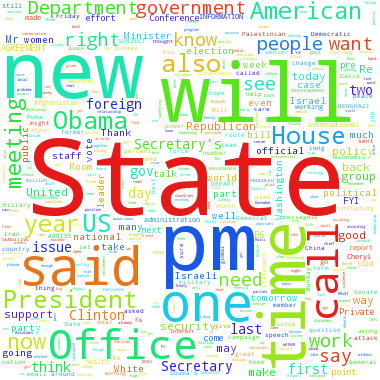

In [8]:
Image.open("wc1.png")

### Discussion:


We have a lot of unrelevant words, especially verbs as 'will', 'said', 'known', 'need' or 'made' that we can remove. 
Also we have some nouns: 'day', 'also', 'two' or 'House'. #Pas sur pour ca

We can also remove the vocabulary of emails like 'Fw', 'Re' that are not present in the STOPWORD list given by WordCloud.

The words, 'government' and 'gov' could be stemmed. This is not done by WordCloud neither, we will do it manually.

### b) word cloud generated by a personnalized standard text pre-processing 

In [9]:
import nltk #, pprint
# au début j'ai utilisé lui...
from nltk import word_tokenize
#nltk.download('all')

In [10]:
import re

In [11]:
# Mais enfait lui est mieux ...
from nltk.tokenize import RegexpTokenizer

We also add manually stop_words adapted to our context.

In [12]:
from nltk.corpus import stopwords
email_list = ['fw', 're', 'pm', 'am']
usual_words = ['would','say', 'think', 'know', 'good', 'bad', 'talk', 'said', 'have', 'had','got', 'call', 'get', 'also', 'want', 'see']
days = ['monday','tuesday','wednesday', 'thursday', 'friday', 'saturday', 'sunday']
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september','october','november','december']
perso_stopwords = stopwords.words("english") + email_list + days + months + usual_words
stop_words = set(perso_stopwords)

In [13]:
lower_text = text.lower()

In [14]:
without_symbols = re.sub("[^a-zA-Z]", " ", lower_text)  

In [15]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(without_symbols)

In [16]:
type(tokens)

list

#### filtering

personnalized stopwords list.

In [17]:
without_stopwords = [words for words in tokens if not words in stop_words]

We remove single characters.

In [18]:
filtered_words = [words for words in without_stopwords if len(words) != 1]

#### stemming:
To convert all words to their root

In [19]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

In [20]:
stem = [lancaster.stem(t) for t in filtered_words]

In [21]:
filtered_words[100], stem[100]

('agreement', 'agr')

In [22]:
filtered_words[311], stem[311]

('commentators', 'com')

We did not use stemming because sometimes, we can't recognize words when they are cutted. Example : agreement -> agr ( 'agr' could be agriculture) or commentators -> com ( 'com' could be communication, commercial ..)

#### lemmatization : 

Plural and singular forms merged, conjugate verbs changed to their usual form..

In [23]:
lem = nltk.WordNetLemmatizer()
lemmed_text = [lem.lemmatize(t) for t in filtered_words]

In [24]:
new_text = " ".join(lemmed_text)

In [25]:
wc = WordCloud(background_color="black", max_words=2000, mask=image_mask,
               stopwords=STOPWORDS, max_font_size= 1000)
# generate word cloud
wc.generate(new_text)
wc.to_file("wc2.png")

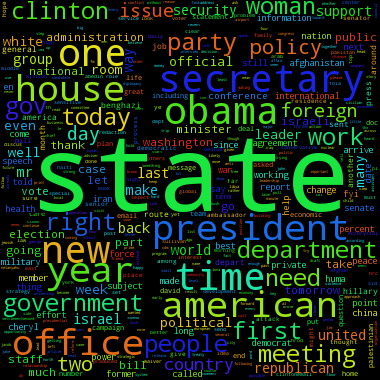

In [26]:
Image.open("wc2.png")

### Discussion:

We have more interesting terms like 'president', 'republican', 'obama', which were already in the first wordcloud, and  'issue', 'policy', 'security', 'country', 'foreign' that are new words. Finally, the more-used words are no more 'Pm' or 'Fw'.

# Question 2 : sentiment analysis

# Question 3 :  use of gensim library

In this section, we will run a statistical model called the 'Latent Dirichlet Model' to discover the abstracts topics that occurs in the collection of e-mails we have.

In [40]:
from gensim import corpora, models, similarities

import re

In [41]:
def preprocess_bag_of_words(bag_of_words) :
    documents = []
    
    return final

Same text prepocessing as in question 1 for the wordcloud, but this time we do it separatly for each e-mails ( Unlike question 1, where all e-mails were first concatenated into one string before text-prepocessing )

In [42]:
documents = []
for i in np.arange(table_text.shape[0]):
    if (len(str(table_text.ExtractedBodyText[i])) > 50):
        string = str(table_text.ExtractedBodyText[i])
        clean_string = re.sub("[^a-zA-Z]", " ",string.lower())
        documents.append(clean_string)
        


In [43]:
final_doc = [[lem.lemmatize(word) for word in document.split() if word not in stop_words] for document in documents]

The Dictionary variable is necessary for running the Latent Dirichlet Allocation model estimation.

In [44]:
dictionary = corpora.Dictionary(final_doc)
corpus = [dictionary.doc2bow(text) for text in final_doc]

We ran the algo for 5, 15 and 50 topics. We realized that the more topics we use, the more useless topics are selected. The best is probably with 5 topics.

#### 5 topics :

We notice one topic that represent well the main subjects of a presidential campain : 'Diplomacy', 'conflict', 'united' and 'state', 'nuclear', 'effort'.
One that represent the busy schedule of Secretary Clinton : 'office', 'arrive', 'route', 'conference', 'meeting', 'room'.

In [45]:
lda_1 = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=5, passes = 3)

In [46]:
lda_1.print_topics(6)

[(0,
  '0.033*"office" + 0.032*"secretary" + 0.027*"w" + 0.020*"room" + 0.019*"meeting" + 0.013*"state" + 0.012*"department" + 0.012*"arrive" + 0.011*"conference" + 0.011*"en"'),
 (1,
  '0.017*"state" + 0.015*"u" + 0.007*"nuclear" + 0.006*"department" + 0.005*"united" + 0.005*"make" + 0.005*"today" + 0.005*"treaty" + 0.004*"tomorrow" + 0.004*"diplomacy"'),
 (2,
  '0.007*"obama" + 0.006*"new" + 0.006*"american" + 0.005*"state" + 0.005*"u" + 0.005*"president" + 0.004*"war" + 0.004*"one" + 0.004*"time" + 0.004*"government"'),
 (3,
  '0.004*"party" + 0.004*"american" + 0.004*"one" + 0.004*"new" + 0.004*"mr" + 0.004*"year" + 0.003*"u" + 0.003*"time" + 0.003*"right" + 0.003*"president"'),
 (4,
  '0.023*"state" + 0.019*"b" + 0.018*"gov" + 0.016*"h" + 0.009*"com" + 0.007*"clintonemail" + 0.007*"hrod" + 0.006*"cheryl" + 0.005*"fyi" + 0.005*"mill"')]

#### 15 topics
-Still interesting topics: - 'private organization' topic : number 2 -> 'today', 'forgot', 'flight', 'come', 'back', 'tommorrow'.
Or 'International conflict' topic : number 14 -> 'iraq', 'civilian', 'conflict', 'military', 'cheryl' (American Lawyer), 'force'.

But there are some unrelevant topics: number 4 or repetitive: number 5 also concern 'private organization'. Topic number 11 does not really make sense. This is more random subjects put together -> 'email', 'please', 'state', 'kosovo', 'today', 'limited', 'back', 'thank'...


In [47]:
lda_2 = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15)

In [48]:
lda_2.print_topics(15)

[(0,
  '0.010*"obama" + 0.010*"new" + 0.009*"treaty" + 0.009*"state" + 0.007*"secretary" + 0.006*"bloomberg" + 0.006*"house" + 0.006*"president" + 0.006*"u" + 0.005*"time"'),
 (1,
  '0.005*"w" + 0.005*"day" + 0.005*"need" + 0.005*"hear" + 0.005*"email" + 0.004*"today" + 0.004*"sorry" + 0.004*"let" + 0.004*"like" + 0.004*"year"'),
 (2,
  '0.014*"u" + 0.012*"state" + 0.006*"diplomat" + 0.005*"bibi" + 0.005*"president" + 0.005*"american" + 0.005*"diplomacy" + 0.004*"leader" + 0.004*"israel" + 0.004*"obama"'),
 (3,
  '0.008*"cloture" + 0.007*"tomorrow" + 0.006*"romney" + 0.005*"bill" + 0.005*"state" + 0.005*"palin" + 0.005*"vote" + 0.005*"today" + 0.004*"sent" + 0.004*"jm"'),
 (4,
  '0.045*"b" + 0.021*"state" + 0.010*"melanne" + 0.008*"verveer" + 0.007*"u" + 0.007*"lona" + 0.007*"verveerms" + 0.006*"f" + 0.005*"c" + 0.005*"department"'),
 (5,
  '0.049*"state" + 0.043*"gov" + 0.034*"h" + 0.019*"com" + 0.018*"clintonemail" + 0.017*"hrod" + 0.017*"b" + 0.010*"huma" + 0.009*"cheryl" + 0.008*"m

#### 50 topics 
Difficult to find an relevant topic..

Maybe the number 44 that shows that Secretary Clinton was doubting the security and the confidentiality of it's private e-mail adress.. -> 'sent', 'via', 'blackberry', 'release', 'declassify'

In [49]:
lda3 = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=50)

In [50]:
lda3.print_topics(100)[44]

(44,
 '0.016*"germany" + 0.015*"bob" + 0.014*"editorial" + 0.014*"pls" + 0.013*"broaden" + 0.010*"add" + 0.010*"thx" + 0.010*"state" + 0.008*"decide" + 0.007*"seeking"')

# Question 4 (bonus) : The communication graph

In [1]:
import nltk 
import gensim
import pycountry
import networkx as nx
import pandas as pd
from collections import Counter
%matplotlib inline
import community as cm

/Users/selmachraibi/anaconda/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
aliases = pd.read_csv('hillary-clinton-emails/Aliases.csv')
del aliases['Id']
email_receivers = pd.read_csv('hillary-clinton-emails/EmailReceivers.csv')
del email_receivers['Id']
emails = pd.read_csv('hillary-clinton-emails/Emails.csv')
persons = pd.read_csv('hillary-clinton-emails/Persons.csv')

- First, we want to build an unweighted and undirected communication graph among the different email senders and recipients. We collect in a DataFrame all the informations about senders and receivers contained in the "emails" DataFrame that could be used.
- We also use the precious information given in the DataFame email_receivers.

In [3]:
information_senders_receivers = emails[['Id','SenderPersonId','ExtractedFrom','ExtractedTo','MetadataFrom','MetadataTo','ExtractedCc']]
information_senders_receivers.set_index(['Id'],inplace=True)

email_receivers.set_index(['EmailId'],inplace=True)

Then, we create a set "edges" which will contain edges of the graph (couples of the form [Sender , Receiver]), a set "id_mails_ok" which contain the id's of the emails for which we know the Id of the sender (from the column 'SenderPersonId' of "information_sender_receivers") AND the Id of the receiver (from email_receivers). The set "remaining_ids" contains id's of the mails for which the Id of the sender is missing from the column 'SenderPersonId' of "information_senders_receivers" or the Id of the receiver is missing from "email_receivers", so we have to search for it in the other columns of "information_sender_receivers". 

In [4]:
edges = set()
id_mails_ok = set(information_senders_receivers[information_senders_receivers.SenderPersonId.notnull()].index)&set(email_receivers.index.values)
remaining_ids = set(emails['Id'])-id_mails_ok

It is easy to retrieve the edges from the mails of id_mails_ok : 

In [5]:
for email_id in id_mails_ok : 
    
    sender = int(information_senders_receivers['SenderPersonId'].loc[email_id])
    receivers = email_receivers.loc[email_id].values
    
    if(len(receivers) == 1) : 
        edges.add((sender,receivers[0]))
        
    else :             
        for receiver in receivers :       
            edges.add((sender,receiver[0]))

At this point, we have retrieved 739 edges : 

In [6]:
len(edges)

739

To retrieve the remaining edges, we have to search in the other columns of "information_sender_receivers". 

NOTE : After doing our experiments, we have found that in fact there is no need to search for informations about the receiver in the columns : 'ExtractedTo' and 'MetadataTo', because the column 'ExtractedCc' contains all the information.

In [7]:
for email_id in remaining_ids : #In that case, either the sender or the receiver are NULL. 
    
    sender = information_senders_receivers['SenderPersonId'].loc[email_id]
    
    #If the sender is null, we try to find it in the dataframe :     
    if(pd.isnull(sender)) : 
        
        information_sender = information_senders_receivers.loc[email_id][['ExtractedFrom']]
        
        if((pd.notnull(information_sender['ExtractedFrom']) and information_sender['ExtractedFrom'] != 'B6')) : 
            
            name_sender = information_sender['ExtractedFrom'].split(',')[0]
            
            for index in persons.index : 
                
                if(name_sender in persons.loc[index].Name ) :
                    
                    sender = persons.loc[index].Id
                    break
                    
                    
      
    #If we didn't find any sender, no need to check for a receiver, we continue
    if(pd.isnull(sender)) : 
        continue
        
    #From now, we know that we found a sender
    
    
    #If we find the email ID in the email_receivers dataframe, we know that we can find a receiver : 
    if(email_id in email_receivers.index) :        
        
        receivers = email_receivers.loc[email_id].values
    
        if(len(receivers) == 1) : 
            edges.add((sender,receivers[0]))
        
        else :             
            for receiver in receivers :       
                edges.add((sender,receiver[0]))
                
        
    #If we don't find it, maybe we can find a receiver but we have to check in information_senders_receivers
    else : 
                
        information_receiver = information_senders_receivers.loc[email_id][['ExtractedTo', 'MetadataTo','ExtractedCc']]
        
        if(pd.notnull(information_receiver['ExtractedCc'])): 
            
            receivers = information_receiver['ExtractedCc'].split(';')
            
            for receiver in receivers :
                
                receiver = receiver.split(',')
                if(len(receiver)>1) : 
                    
                    name_receiver = receiver[0]
                    
                    for index in persons.index : 
                
                        if(name_receiver in persons.loc[index].Name ) :
                    
                            receiver = persons.loc[index].Id 
                            edges.add((sender,receiver))
                            break

We only retrieved 10 more edges. For all the remaining emails, the id's of the sender and the receiver are both null.

In [8]:
len(edges)

749

Now we use the NX library to draw the communication graph :

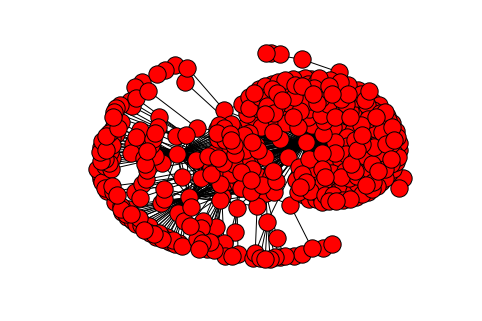

In [9]:
graph = nx.Graph()
graph.add_edges_from(edges)
nx.draw(graph,pos=nx.spring_layout(graph))

Due to the high number of vertices, the graph is not very clear. However, we can still remark a big community and smaller ones above. Let's now use the method best_partition of the community module and see the results : 

In [10]:
partition = cm.best_partition(graph)
partition

AttributeError: module 'community' has no attribute 'best_partition'

The result is a dictionnary where the keys are the id's of the people and the values are the community. We have 17 communities (0 to 16), and we suspect that the big community is the community 2. 

In [11]:
print(set(partition.values()))

NameError: name 'partition' is not defined

Now we want to print the 20 most frequent words used by the authors of each community :

In [12]:
community_emails = {} #In this dictionary, the key is the community and the value is the set of email written 
                        #by someone in this community

for community in set(partition.values()): 
    
  
    emails_in_community = set()
    
    for index in emails.index :        
        if(partition.get(emails.loc[index]['SenderPersonId']) == community) :
            emails_in_community.add(emails.loc[index]['Id'])
     
    community_emails[community] = emails_in_community
    print('For community ', community, 'the number of email is : ', len(emails_in_community))
            
            

NameError: name 'partition' is not defined

Because the number of emails for most communities is small, we will only study the case of communities 2,3,4,6,8,9,10. 

In [ ]:
emails.set_index(['Id'],inplace=True)

In [ ]:
for community in [2,3,4,6,8,9,10] :
    
    bag_of_words = str(emails.loc[list(community_emails[community])]['ExtractedBodyText'].values)
    
    #TRAITER LE TRUC ICI 

In [ ]:
bag_of_words

In [ ]:
#trouver un moyen darranger ca

def preprocess_bag_of_words(bag_of_words) :
    
    
    
    email_list = ['fw', 're', 'pm', 'am']
    usual_words = ['would','say', 'think', 'know', 'good', 'bad', 'talk', 'said', 'have', 'had','got', 'call', 'get', 'also', 'want', 'see']
    days = ['monday','tuesday','wednesday', 'thursday', 'friday', 'saturday', 'sunday']
    months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september','october','november','december']
    perso_stopwords = stopwords.words("english") + email_list + days + months + usual_words
    stop_words = set(perso_stopwords)
    
    bag_of_words = bag_of_words.lower()
    without_symbols = re.sub("[^a-zA-Z]", " ", bag_of_words) 
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(without_symbols)
    
    return tokens
    
    
    